### Introduction:
This notebook is the second part of the exercises recommended for Chapter 2. The primary objective of this notebook is to serve as a guide to solve the exercises. 

**Exercise 4**

#### Imports
Import the necesary libraries to run the notebook

In [1]:
from web3 import Web3
from matplotlib import pyplot as plt
import json
import requests
import pandas as pd

#### Connection
Create a connection to the RSK network using the `web3` library and the Get Block URL provided. Check if the connection to the network is successful using the `web3.isConnected()` method.

In [2]:
getblock_url= 'https://rsk.getblock.io/[YOUR API KEY]/mainnet/'
web3= Web3(Web3.HTTPProvider (getblock_url))
web3.isConnected()

True

#### Count transactions
Question i. Retrieve the latest block number and then retrieve the transaction count for the last 100 blocks. It will then store the transaction count in a list and use the matplotlib library to create a graph of the data.

In [3]:
end_block =  web3.eth.getBlock(block_identifier='latest').number
start_block = end_block-100

transaction_count= []
for block in range(start_block, end_block):
    counts= (web3.eth.getBlockTransactionCount(block))
    transaction_count.append (counts)

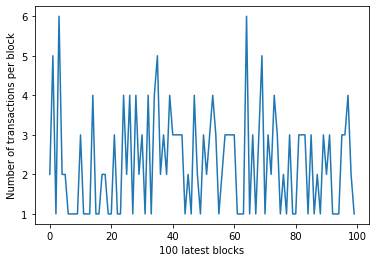

In [4]:
plt.plot (transaction_count)
plt.xlabel("100 latest blocks")
plt.ylabel("Number of transactions per block")
plt.show()

For question ii. Get the latest block number, then loop through the last 100 blocks to get the transaction hashes. Then loop through the transaction hashes to get the  `to ` address of each transaction and append it to the recepients list.

In [5]:
end_block =  web3.eth.getBlock(block_identifier='latest').number
start_block = end_block-100

recepients= []
for block in range(start_block, end_block):
    for tx_hash in (web3.eth.getBlock(block_identifier=block).transactions):
        to_address = web3.eth.get_transaction(tx_hash).to
        recepients.append (to_address)

Use the recepients list created in the previous cell to create a dictionary with the number of transactions per address (the address as the key and the number of transactions as the value).

In [6]:
latestblocks_recepients = {i:recepients.count(i) for i in recepients}
latestblocks_recepients

{'0xa288319eCb63301e21963E21EF3Ca8fb720d2672': 13,
 '0x0000000000000000000000000000000001000008': 100,
 '0xCfF3fcaeC2352C672C38d77cb1a064B7D50ce7e1': 6,
 '0x461750b4824b14c3d9b7702bC6fBB82469082b23': 34,
 '0xBEd51D83CC4676660e3fc3819dfAD8238549B975': 35,
 '0x2AcC95758f8b5F583470ba265EB685a8F45fC9D5': 4,
 '0x0000000000000000000000000000000001000006': 24,
 '0x98aCE08D2b759a265ae326F010496bcD63C15afc': 3,
 '0x7eCFDA6072942577D36F939Ad528B366B020004b': 3,
 '0xf773B590aF754D597770937Fa8ea7AbDf2668370': 1,
 '0x1aC3113A8Da15ee2Ae678a63B8D188FA835bb3CD': 1,
 '0x115cAF168c51eD15ec535727F64684D33B7b08D1': 1,
 '0xB1fc9817C4ad3C40562DfF1159732d657831558A': 4}

**Exercise 5**

#### Connection
Create a connection to the Ethereum network using the `web3` library and the Infura URL provided. Check if the connection to the Ethereum network is successful using the `web3.isConnected()` method.

In [7]:
infura_url= 'https://mainnet.infura.io/v3/[YOUR API KEY]'
web3= Web3(Web3.HTTPProvider (infura_url))
web3.isConnected()

True

#### BAYC Smart Contract specifics
Load the ABI stored in the `ba_abi.json` file. Use the `web3` library to create a contract instance from the Ethereum address stored in the sc_address variable and the ABI stored in the ba_abi.json file.

In [8]:
sc_address="0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D"
with open ("./ba_abi.json") as f:
    abi= json.load (f)
baContract = web3.eth.contract(address=sc_address, abi=abi)

#### Retrieve current USD price of Ethereum
Use the `requests` library to make a request to the CoinGecko API. 

In [9]:
url="https://api.coingecko.com/api/v3/simple/price?ids=ethereum&vs_currencies=usd"
response= requests.get (url)
data= response.json()
ether_price= data ['ethereum']['usd']

#### Retrieve Owners and Balances
Retrieve the address and balance of the owner of each ape. The balance is converted from Wei to Ether and multiplied by the Ethereum price in USD stored in the `ether_price` variable.

In [10]:
owners=[]
balances = []
ape_ids=[]
for ape_id in range (0,10000):
    ape_ids.append (ape_id)
    owner= baContract.functions.ownerOf(ape_id).call()
    owners.append (owner)
    balance = (web3.fromWei(web3.eth.getBalance(owner), "ether"))
    balances. append ((float (balance))* ether_price)

#### Create a DataFrame
Create a DataFrame from the lists created in the previous cell and drop duplicates (in case an address holds more than one Ape)

In [11]:
dict_todf= {'Ape_ids':ape_ids,'Bayc_Owners':owners, 'Address_balance':balances}
df= pd.DataFrame (dict_todf, columns= ["Id","Bayc_Owners", "Address_balance"])
df.head()

,Id,Bayc_Owners,Address_balance
0,NaN,0xf7801B8115f3Fe46AC55f8c0Fdb5243726bdb66A,332.958990
1,NaN,0x46EFbAedc92067E6d60E84ED6395099723252496,983.752903
2,NaN,0xc5c7b46843014B1591e9aF24de797156cde67f08,4.025133
3,NaN,0x2474A7227877F2b65185F09468AF7C6577FA207C,19.315258
4,NaN,0x3b0C3Da5Da1041400ce8917B698a0fB83a0b4467,81.047202


In [12]:
df.shape

(10000, 3)

In [13]:
df.drop_duplicates(subset=['Bayc_Owners'], inplace= True)
df.shape

(5684, 3)

#### Calculate Average Balance
Calculate the average balance of a BAYC holder in USD (at current price).

In [14]:
print ("The average in USD (at current price) of a BAYC holder is $",df.Address_balance.mean())

The average in USD (at current price) of a BAYC holder is $ 54927.32949342088
